In [45]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [3]:
BASE_DIR="wiki_crop/"

In [33]:
image_paths=[]
ages=[]

In [34]:
for subdir in os.listdir(BASE_DIR):
    subdir_path = os.path.join(BASE_DIR, subdir)

    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):  # Loop through images in folder
            if file.endswith(".jpg"):
                parts = file.split("_")
                birth_year = int(parts[1].split("-")[0])  # Extract birth year correctly
                capture_year = int(parts[2][:4])  # Extract the first 4 digits (year)
                
                age = capture_year - birth_year
                
                if age < 0 or age>100:  # Sanity check
                    continue
                image_paths.append(os.path.join(subdir_path, file))
                ages.append(age)


In [35]:
ages

[67,
 27,
 46,
 43,
 48,
 38,
 29,
 25,
 68,
 60,
 35,
 64,
 25,
 19,
 42,
 51,
 20,
 25,
 33,
 31,
 28,
 51,
 30,
 49,
 23,
 25,
 36,
 31,
 23,
 36,
 26,
 31,
 20,
 40,
 35,
 34,
 61,
 32,
 21,
 45,
 51,
 34,
 33,
 35,
 19,
 22,
 26,
 50,
 29,
 59,
 22,
 53,
 44,
 27,
 32,
 38,
 32,
 94,
 24,
 29,
 24,
 73,
 47,
 23,
 56,
 24,
 26,
 49,
 26,
 37,
 66,
 19,
 32,
 30,
 36,
 52,
 48,
 27,
 42,
 40,
 37,
 0,
 82,
 76,
 28,
 21,
 50,
 30,
 32,
 50,
 75,
 26,
 26,
 55,
 45,
 24,
 60,
 27,
 26,
 72,
 18,
 77,
 54,
 30,
 30,
 31,
 41,
 58,
 65,
 35,
 22,
 34,
 56,
 36,
 31,
 52,
 77,
 33,
 38,
 88,
 33,
 57,
 87,
 21,
 35,
 56,
 31,
 27,
 48,
 20,
 55,
 38,
 29,
 24,
 24,
 24,
 45,
 23,
 45,
 33,
 32,
 26,
 23,
 29,
 29,
 28,
 24,
 30,
 25,
 30,
 78,
 80,
 46,
 31,
 37,
 15,
 31,
 28,
 28,
 37,
 22,
 33,
 73,
 21,
 21,
 69,
 16,
 37,
 30,
 49,
 30,
 73,
 31,
 63,
 24,
 69,
 39,
 21,
 32,
 37,
 21,
 46,
 23,
 30,
 56,
 22,
 22,
 27,
 43,
 29,
 62,
 28,
 57,
 28,
 24,
 24,
 27,
 38,
 35,
 22,
 

In [36]:
print(f"Total images processed: {len(image_paths)}")
print(f"First 5 Images & Ages: {list(zip(image_paths[:5], ages[:5]))}")


Total images processed: 30060
First 5 Images & Ages: [('wiki_crop/00\\10049200_1891-09-16_1958.jpg', 67), ('wiki_crop/00\\10110600_1985-09-17_2012.jpg', 27), ('wiki_crop/00\\10126400_1964-07-07_2010.jpg', 46), ('wiki_crop/00\\1013900_1917-10-15_1960.jpg', 43), ('wiki_crop/00\\10166400_1960-03-12_2008.jpg', 48)]


In [37]:
print(f"Min Age: {np.min(ages)}, Max Age: {np.max(ages)}")
print(f"Average Age: {np.mean(ages)}")

Min Age: 0, Max Age: 100
Average Age: 36.89594145043247


In [44]:
IMG_SIZE = (128, 128)

def preprocess_image(image_path):
    img = cv2.imread(image_path)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV loads as BGR)
    img = cv2.resize(img, IMG_SIZE)  # Resize to fixed size
    img = img / 255.0  # Normalize pixel values (0 to 1)
    return img

In [40]:
X = np.array([preprocess_image(img_path) for img_path in image_paths])  # Convert all images
y = np.array(ages)  # Convert ages to NumPy array

print(f"Processed {len(X)} images.")
print(f"Image shape: {X.shape}, Labels shape: {y.shape}")


Processed 30060 images.
Image shape: (30060, 128, 128, 3), Labels shape: (30060,)


In [41]:
np.save("X_images.npy", X)
np.save("y_labels.npy", y)
print("Preprocessed data saved!")


Preprocessed data saved!


In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [47]:
def build_cnn_model(input_shape=(128, 128, 3)):
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),  # Prevent overfitting
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),  
        layers.Dense(1, activation='linear')  # Regression output (Age)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

# Build the model
model = build_cnn_model()
model.summary()


C:\Users\dubey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,516,033 (32.49 MB)

 Trainable params: 8,515,585 (32.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [48]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(
    X_train, y_train,
    epochs=20, 
    batch_size=32,
    validation_data=(X_val, y_val)
)

model.save("age_detection_cnn.h5")
print("Model saved successfully!")


Epoch 1/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 188s 243ms/step - loss: 360.9367 - mae: 14.4309 - val_loss: 250.0209 - val_mae: 11.1145
Epoch 2/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 181s 241ms/step - loss: 247.1480 - mae: 11.8111 - val_loss: 224.2425 - val_mae: 11.3973
Epoch 3/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 177s 236ms/step - loss: 222.7617 - mae: 11.1914 - val_loss: 256.3702 - val_mae: 12.9532
Epoch 4/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 182s 242ms/step - loss: 206.0921 - mae: 10.7922 - val_loss: 190.5288 - val_mae: 10.2166
Epoch 5/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 182s 242ms/step - loss: 189.6917 - mae: 10.2723 - val_loss: 222.5109 - val_mae: 11.1409
Epoch 6/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 185s 246ms/step - loss: 175.4028 - mae: 9.8322 - val_loss: 198.5006 - val_mae: 10.5112
Epoch 7/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 187s 248ms/step - loss: 147.0021 - mae: 8.8873 - val_loss: 185.7689 - val_mae: 10.3154
Epoch 8/20
752/752 ━━━━━━━━━━━━━━━━━━━━ 199s 264ms/step - loss: 136.4690 - mae: 8.4509 - val_loss: 200.593

Model saved successfully!


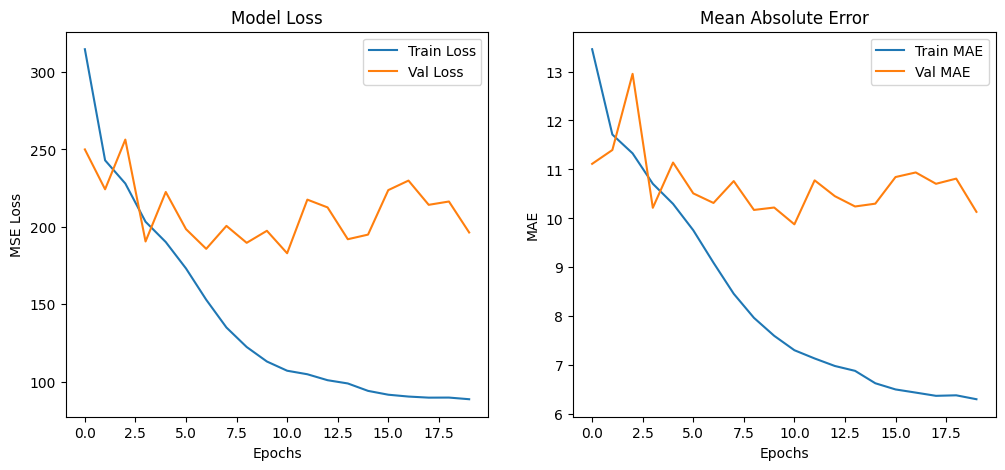

In [49]:
# Plot Loss & MAE
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Model Loss")
plt.legend()

# Mean Absolute Error (MAE)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title("Mean Absolute Error")
plt.legend()

plt.show()


In [50]:
def predict_age(image_path, model):
    img = preprocess_image(image_path)  # Preprocess like training images
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    predicted_age = model.predict(img)[0][0]
    return round(predicted_age, 2)

# Load the trained model
model = keras.models.load_model("age_detection_cnn.h5")

# Test on a sample image
test_image = "wiki_crop/00/23300_1962-06-19_2011.jpg"
predicted_age = predict_age(test_image, model)
print(f"Predicted Age: {predicted_age}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Predicted Age: 43.22999954223633


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


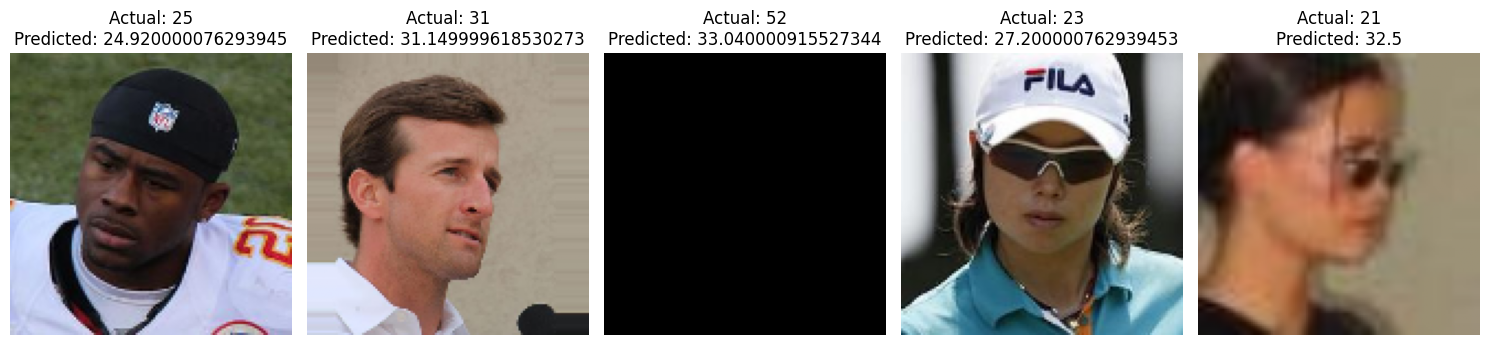

In [52]:
def plot_test_results(model, test_images, test_labels, num_samples=5):
    plt.figure(figsize=(15, 5))
    
    indices = np.random.choice(len(test_images), num_samples, replace=False)  # Select random samples
    
    for i, idx in enumerate(indices):
        img = test_images[idx]
        true_age = test_labels[idx]
        
        img_input = np.expand_dims(img, axis=0)  # Add batch dimension
        predicted_age = model.predict(img_input)[0][0]  # Predict age
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Actual: {true_age}\nPredicted: {round(predicted_age, 2)}", fontsize=12)
    
    plt.tight_layout()
    plt.show()

# Call the function with the trained model
plot_test_results(model, X_val, y_val, num_samples=5)

In [ ]:
#Since my model is performing age regression (predicting a continuous numerical value), traditional classification metrics like confusion matrix, precision, and recall are not applicable.